## loading dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D , MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
from PIL import Image
from sklearn.metrics import confusion_matrix
import itertools
warnings.filterwarnings('ignore')
import keras
from sklearn.model_selection import StratifiedKFold

In [3]:
DATADIR = "C:\\AI-project\\Fruits_Vegetables\\train"

In [4]:
CATEGORIES = ['apple','carrot','cucumber' ,'grapes','jalepeno','mango','onion','pineapple','spinach','sweetpotato']


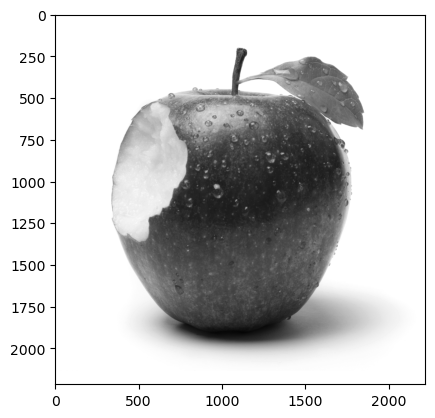

In [5]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [6]:
print(img_array.shape)

(2216, 2218)


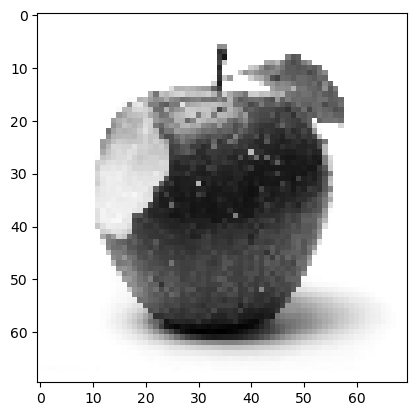

In [7]:
IMG_SIZE = 70

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')

In [8]:
features=[]
labels=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_name = os.path.basename(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                features.append([new_array])
                labels.append([class_name])
            except Exception as e:
                pass
                
                
                
create_training_data()

In [9]:
test_data_directory = "C:\\AI-project\\Fruits_Vegetables\\test"

In [10]:
test_features=[]
test_labels=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(test_data_directory,category)
        class_name = os.path.basename(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_features.append([new_array])
                test_labels.append([class_name])
            except Exception as e:
                pass
                
                
                
create_training_data()

## preprocessing

In [11]:
X_train = np.array(features).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test  = np.array(test_features).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [12]:
X_train.shape

(877, 70, 70, 1)

In [13]:
X_test.shape

(100, 70, 70, 1)

In [14]:
label_encoder = LabelEncoder()

In [15]:
y_train = label_encoder.fit_transform(labels)
y_test = label_encoder.fit_transform(test_labels)

In [16]:
y_train[777]

8

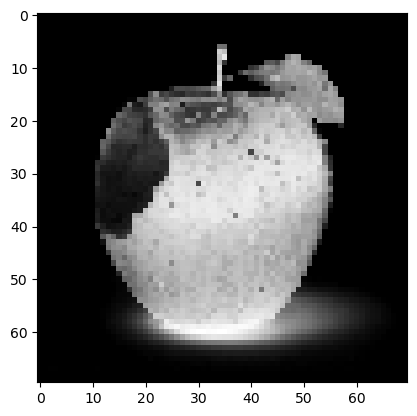

In [17]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

 ## scaling

In [18]:
X_train =tf.keras.utils.normalize(X_train, axis=1)
X_test =tf.keras.utils.normalize(X_test, axis=1)


## normalized picture

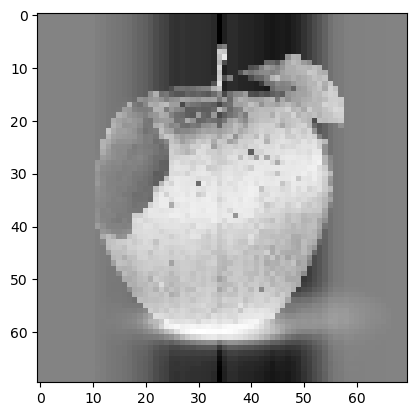

In [19]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [20]:
X_train[0]

array([[[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       ...,

       [[0.1190608 ],
        [0.1190608 ],
        [0.11859866],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]]])

## build the model

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu)) ## 128 neurons in the layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(500,activation=tf.nn.relu))


model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [22]:
r = model.fit(X_train,y_train,epochs=25)

Epoch 1/25


28/28 [==============================] - 1s 18ms/step - loss: 2.5885 - accuracy: 0.1163
Epoch 2/25
28/28 [==============================] - 0s 17ms/step - loss: 2.0689 - accuracy: 0.2965
Epoch 3/25
28/28 [==============================] - 0s 18ms/step - loss: 1.7607 - accuracy: 0.3922
Epoch 4/25
28/28 [==============================] - 0s 17ms/step - loss: 1.5251 - accuracy: 0.4903
Epoch 5/25
28/28 [==============================] - 0s 17ms/step - loss: 1.3769 - accuracy: 0.5530
Epoch 6/25
28/28 [==============================] - 0s 18ms/step - loss: 1.2218 - accuracy: 0.6283
Epoch 7/25
28/28 [==============================] - 0s 17ms/step - loss: 1.0515 - accuracy: 0.7138
Epoch 8/25
28/28 [==============================] - 0s 18ms/step - loss: 0.9558 - accuracy: 0.7412
Epoch 9/25
28/28 [==============================] - 0s 17ms/step - loss: 0.8492 - accuracy: 0.7834
Epoch 10/25
28/28 [==============================] - 0s 17ms/step - loss: 0.7818 - accuracy: 0.8153
Epoch 1

In [23]:
loss ,acc = model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.9400


In [24]:
loss , acc

(0.37794655561447144, 0.9399999976158142)

In [31]:
# Evaluate the model and generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


4/4 [==============================] - 0s 4ms/step


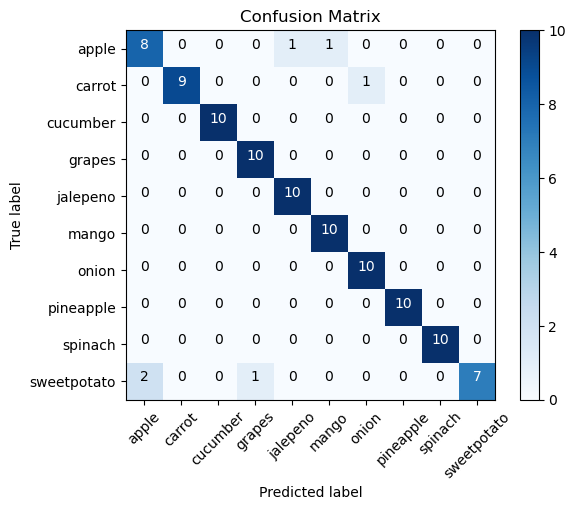

In [33]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_classes, classes=CATEGORIES)


In [34]:
def predict_label(image_path):
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    normalized_image = tf.keras.utils.normalize(new_array, axis=1)
    reshaped_image = normalized_image.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    prediction = model.predict(reshaped_image)
    predicted_class = np.argmax(prediction)
    
    return label_encoder.inverse_transform([predicted_class])[0]



In [35]:
# Example usage
image_path = "C:\\AI-project\\Fruits_Vegetables\\validation\\onion\\Image_2.jpg"
predicted_label = predict_label(image_path)
print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 18ms/step
Predicted Label: onion


In [36]:
# Example usage
image_path = "C:\\AI-project\\Fruits_Vegetables\\validation\\jalepeno\\Image_5.jpg"
predicted_label = predict_label(image_path)
print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 28ms/step
Predicted Label: jalepeno
